# Datos de cardiotocografía fetal

# Equipo 1080D
Alumno: Hector Alejandro Aguirre Garza 
Alumno: Luis Zendel Samperio Guzmán 


# Acerca del conjunto de datos
Se procesaron automáticamente 2126 cardiotocogramas fetales (CTG) y se midieron las características diagnósticas respectivas. Los CTG también fueron clasificados por tres obstetras expertos y se les asignó una etiqueta de clasificación de consenso a cada uno de ellos. La clasificación se realizó con respecto a un patrón morfológico (A, B, C...) y a un estado fetal (N, S, P). Por lo tanto, el conjunto de datos se puede utilizar para experimentos de 10 o 3 clases.
# Características:
Nombre del archivo: del examen CTG

Fecha: del examen

b: instante de inicio

e: instante de fin

LBE: valor basal (médico experto)

LB: valor basal (SisPorto)

AC: aceleraciones (SisPorto)

FM: movimiento fetal (SisPorto)

UC: contracciones uterinas (SisPorto)

ASTV: porcentaje de tiempo con variabilidad anormal a corto plazo (SisPorto)

mSTV: valor medio de la variabilidad a corto plazo (SisPorto)

ALTV: porcentaje de tiempo con variabilidad anormal a largo plazo (SisPorto)

mLTV: valor medio de la variabilidad a largo plazo (SisPorto)

DL: desaceleraciones ligeras

DS: desaceleraciones severas

DP: desaceleraciones prolongadas

DR: desaceleraciones repetitivas

Ancho: ancho del histograma

Mín.: frecuencia baja del histograma

Máx.: frecuencia alta del histograma

Nmax: número de picos del histograma

Nzeros: número de ceros del histograma

Moda: moda del histograma

Media: media del histograma

Mediana: mediana del histograma

Varianza: varianza del histograma

Tendencia: tendencia del histograma: -1=asimétrico izquierdo; 0=simétrico; 1=asimétrico derecho

A: sueño tranquilo

B: sueño REM

C: vigilancia tranquila

D: vigilancia activa

SH: patrón de cambio (A o Susp con cambios)

AD: patrón acelerativo/desacelerativo (situación de estrés)

DE: patrón desacelerativo (estimulación vagal)

LD: patrón en gran medida desacelerativo

FS: patrón plano-sinusoidal (estado patológico)

SUSP: patrón sospechoso

CLASE: Código de clase (1 a 10) para las clases A a SUSP

NSP:- Normal=1; Sospechoso=2; Patológico=3

## Import de librerías 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import load_iris
from sklearn.svm import OneClassSVM

## Lectura de archivo que contiene los datos 

In [43]:
df = pd.read_csv('CTG.csv')

# Mostrar las primeras 5 filas del archivo CSV
print(df.head())

       FileName       Date      SegFile      b       e    LBE     LB   AC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]


## Obtener variables numericas
Estas son variables que contienen datos cuantitativos, es decir, números que representan medidas o cantidades.
Las variables continuas son variables que contienen datos cualitativos, es decir, categorías o etiquetas que describen diferentes grupos o clases. Las variables categóricas pueden ser.
Es importante diferenciar las variables ya que cada una tiene tratos diferentes y representan diferentes cosas. 

In [44]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64'])

# Mostrar las columnas numéricas
print(columnas_numericas.columns)
# Mostrar el número de valores faltantes por columna
print(df.isnull().sum())


Index(['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')
FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64


## Obtener datos estadisticos de las variables numericas 
Esto incluye:

count: Número de valores no nulos.
mean: Media aritmética.
std: Desviación estándar.
min: Valor mínimo.
25%: Percentil 25.
50%: Mediana (percentil 50).
75%: Percentil 75.
max: Valor máximo.

In [45]:
# Obtener estadísticas descriptivas
estadisticas = columnas_numericas.describe()
print(estadisticas)


                 b            e          LBE           LB           AC  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    878.439793  1702.877234   133.303857   133.303857     2.722484   
std     894.084748   930.919143     9.840844     9.840844     3.560850   
min       0.000000   287.000000   106.000000   106.000000     0.000000   
25%      55.000000  1009.000000   126.000000   126.000000     0.000000   
50%     538.000000  1241.000000   133.000000   133.000000     1.000000   
75%    1521.000000  2434.750000   140.000000   140.000000     4.000000   
max    3296.000000  3599.000000   160.000000   160.000000    26.000000   

                FM           UC         ASTV         MSTV         ALTV  ...  \
count  2127.000000  2127.000000  2127.000000  2127.000000  2127.000000  ...   
mean      7.503056     3.669017    47.008933     1.335449     9.884814  ...   
std      39.030452     2.877148    17.210648     0.891543    18.476534  ...   
min       0.00000

In [46]:
# Calcular la moda de cada columna numérica
modas = columnas_numericas.mode()
print(modas)


     b       e    LBE     LB   AC   FM   UC  ASTV  MSTV  ALTV  ...    C    D  \
0  0.0  1199.0  133.0  133.0  0.0  0.0  0.0  60.0   0.8   0.0  ...  0.0  0.0   

     E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[1 rows x 37 columns]


## Identificar variables estadisticas 


In [47]:
# Seleccionar las variables categóricas
categorical_vars = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", categorical_vars)


Variables categóricas: Index(['FileName', 'Date', 'SegFile'], dtype='object')


## Obtener la frecuencia de cada variable categorica 


In [48]:
# Obtener la frecuencia de cada categoría en las variables categóricas
for var in categorical_vars:
    print(f"\nFrecuencia de categorías en {var}:")
    print(df[var].value_counts())



Frecuencia de categorías en FileName:
FileName
S8001034.dsp    34
S7001029.dsp    33
S8001037.dsp    30
S8001038.dsp    26
S7001027.dsp    24
                ..
S7001006.dsp     1
S7001008.dsp     1
Mepfp_3.txt      1
Mrmmf_1.txt      1
Variab10.txt     1
Name: count, Length: 352, dtype: int64

Frecuencia de categorías en Date:
Date
2/22/1995     240
5/2/1996      160
7/18/1996     101
10/3/1996      92
5/3/1996       88
5/10/1998      85
5/1/1996       79
10/6/1996      79
6/6/1998       77
9/25/1996      74
1/8/1995       71
10/25/1997     70
1/4/1980       56
8/20/1996      55
11/26/1997     53
4/8/1998       53
5/6/1996       53
8/28/1996      52
12/9/1996      50
8/16/1996      43
7/16/1996      42
11/14/1997     38
9/23/1996      37
10/24/1997     34
12/20/1997     33
10/1/1997      30
3/23/1998      29
8/19/1996      28
9/20/1996      24
3/10/1997      23
8/31/1996      22
10/14/1996     21
1/2/1997       21
8/21/1996      19
9/10/1997      17
9/26/1996      10
12/23/1996     1

## Matriz de correlación dentre las variables numéricas 

In [49]:
matriz_correlacion = columnas_numericas.corr()
print(matriz_correlacion)

                 b         e       LBE        LB        AC        FM  \
b         1.000000  0.944912 -0.020400 -0.020400 -0.038359 -0.133849   
e         0.944912  1.000000 -0.013979 -0.013979  0.071572 -0.119249   
LBE      -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
LB       -0.020400 -0.013979  1.000000  1.000000 -0.077967 -0.033305   
AC       -0.038359  0.071572 -0.077967 -0.077967  1.000000  0.053956   
FM       -0.133849 -0.119249 -0.033305 -0.033305  0.053956  1.000000   
UC        0.225595  0.386856 -0.127722 -0.127722  0.212100  0.010623   
ASTV     -0.126355 -0.066374  0.305570  0.305570 -0.197985 -0.095019   
MSTV      0.040505  0.044605 -0.279607 -0.279607  0.191378  0.172669   
ALTV     -0.109861 -0.104566  0.285630  0.285630 -0.345162 -0.038904   
MLTV     -0.100027 -0.108141 -0.032091 -0.032091 -0.128901  0.069739   
DL        0.091783  0.163257 -0.155908 -0.155908 -0.011350  0.110411   
DS        0.063977  0.068221 -0.053518 -0.053518 -0.039341  0.09

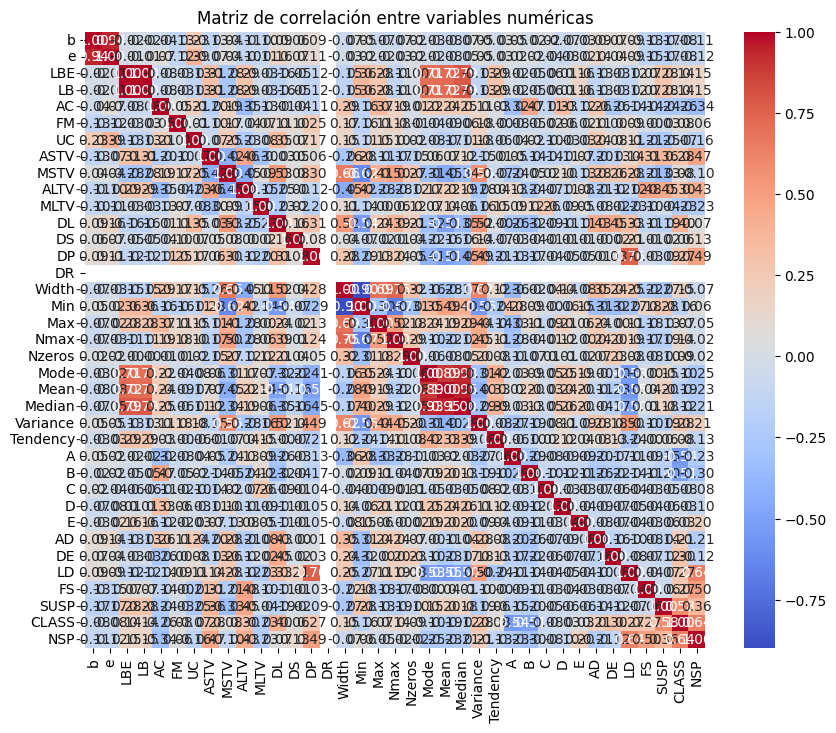

In [50]:
plt.figure(figsize=(10,8))
sb.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

## Tratamiento Missing 
Para rellenar los espacios vacíos en las variables numéricas se utilizará la media, ya que a lo sumo son 3 valores faltantes en las variables. El usar la media me permitirá mantener un equilibrio en el conjunto de datos y no introducir sesgos. 

In [51]:
# Rellenar valores faltantes con la media de cada variable numérica
columnas_numericas.fillna(columnas_numericas.mean(), inplace=True)

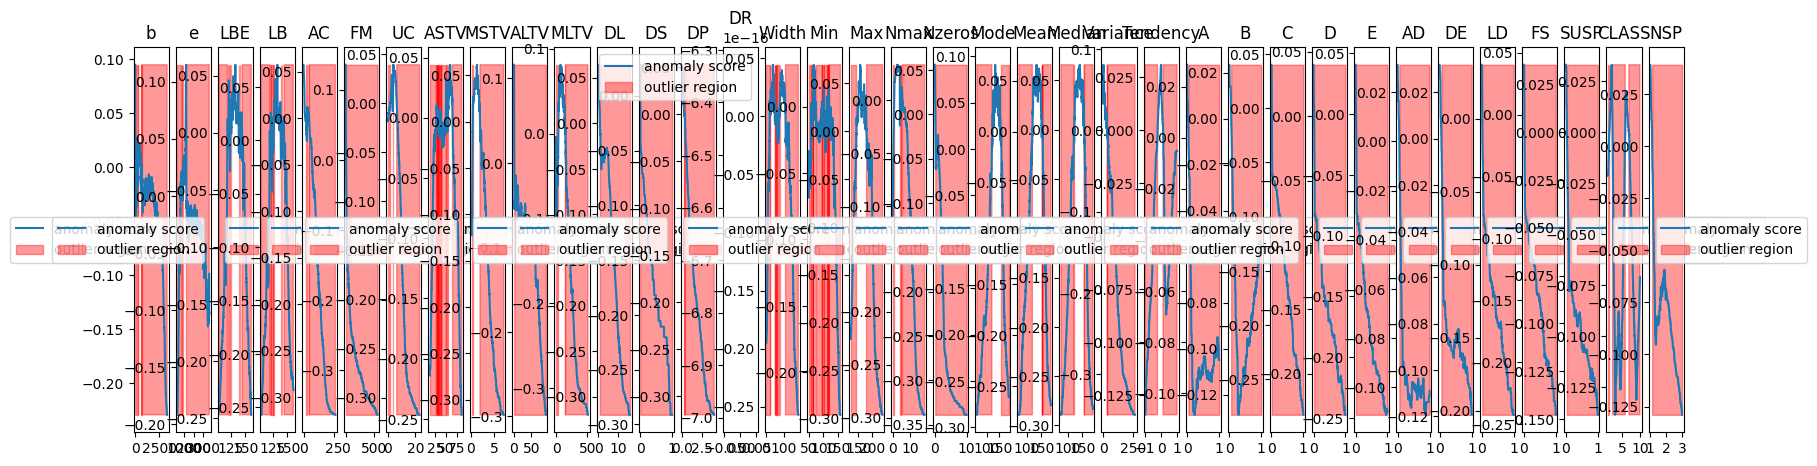

In [52]:
lst_cols = columnas_numericas.columns
fig, axs = plt.subplots(1, len(lst_cols), figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(lst_cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(columnas_numericas[column].values.reshape(-1,1))

    xx = np.linspace(columnas_numericas[column].min(), columnas_numericas[column].max(), len(columnas_numericas)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                     where=outlier==-1, color='r',
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)


## Algoritmo de clustering 
K-means 


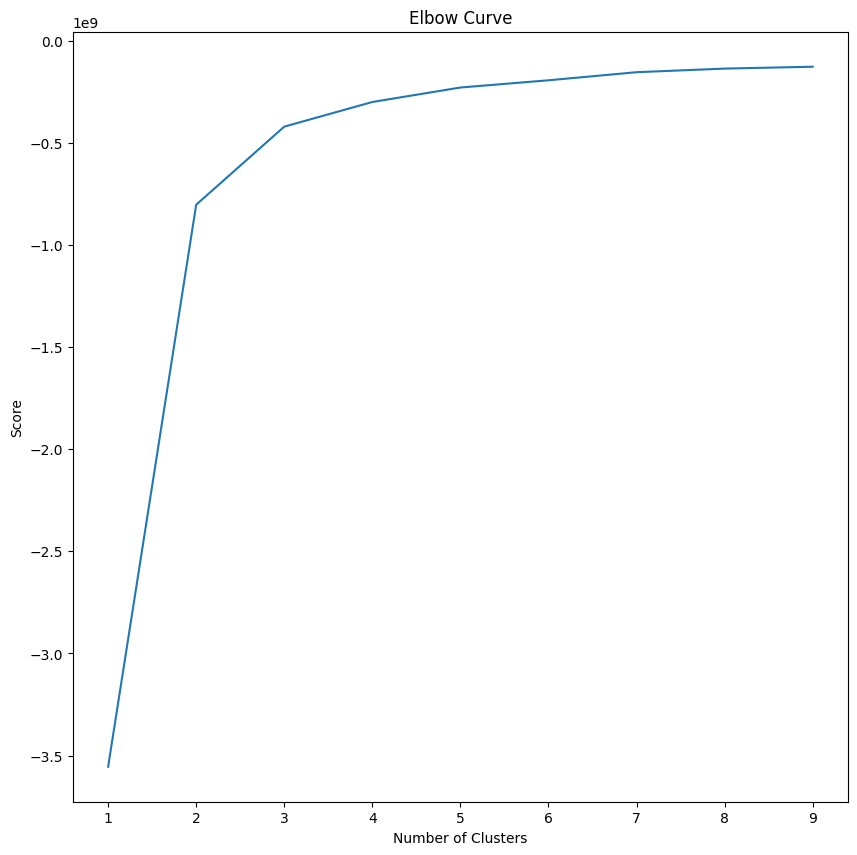

In [53]:
X = columnas_numericas.to_numpy()
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [54]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_

[1 1 1 ... 0 0 0]


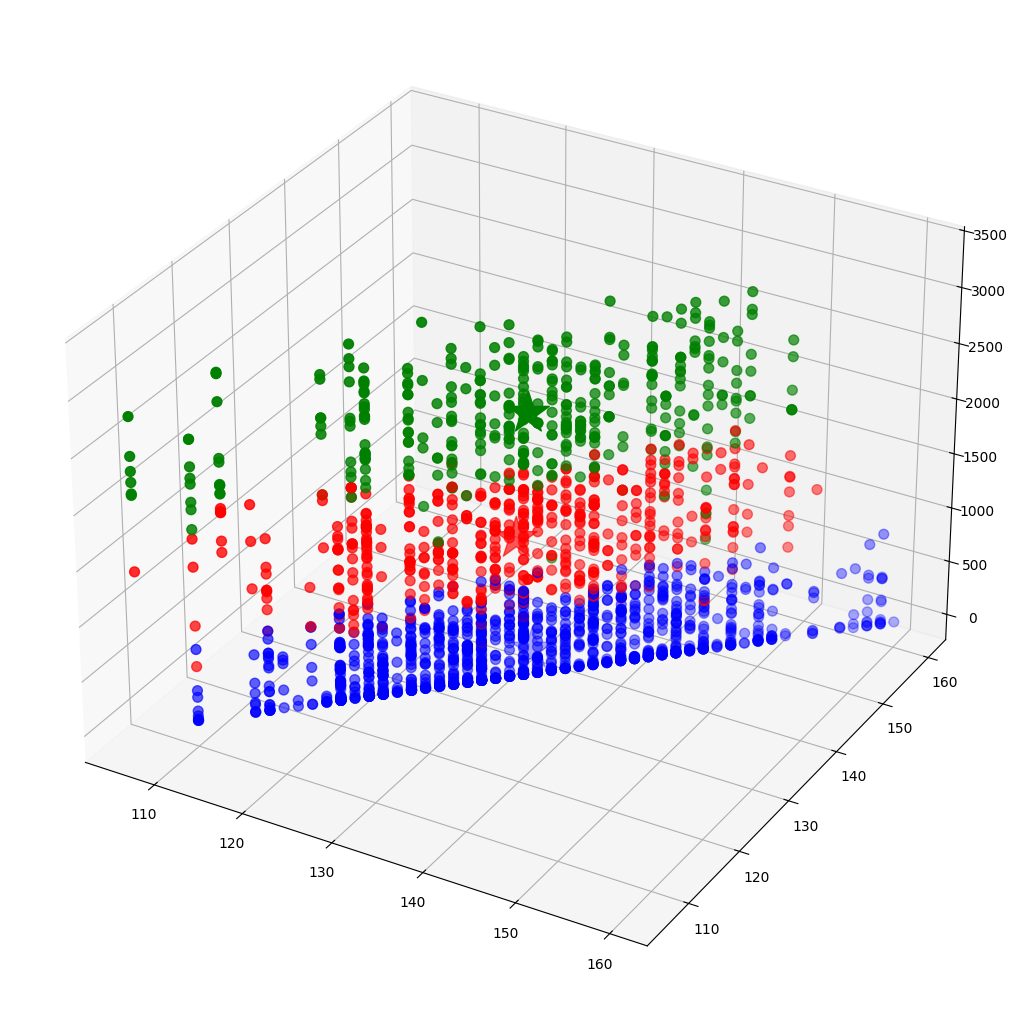

In [55]:
labels = kmeans.predict(X)
print(labels)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red', 'blue', 'green'] #, 'cyan', 'yellow', 'black', 'gray', 'orange', 'pink', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 3], X[:, 3], X[:, 0], c=asignar, s=50) # Datos
ax.scatter(C[:, 3], C[:, 3], C[:, 0], marker='*', c=colores, s=1000); # Centroides

## Descripción de modelos utilizados 
1. Tratamiento de Missing Values (Valores Faltantes): Media
Descripción:
Para manejar los valores faltantes en el conjunto de datos, optaste por rellenarlos utilizando la media de cada variable numérica. Esto significa que los valores faltantes fueron sustituidos por la media de los valores disponibles para cada variable, lo que es una estrategia común cuando los datos faltantes son pocos y no se espera que distorsionen significativamente la distribución de los datos.


- Ventajas:
Simplicidad: Es un método sencillo y fácil de implementar.
Conservación de la cantidad de datos: Al rellenar en lugar de eliminar filas, conservas la mayor cantidad de datos posible.
Consistencia con los datos: Si las variables siguen una distribución aproximadamente normal, la media es una buena estimación de los valores centrales.
- Desventajas:
Sensibilidad a outliers: Si una variable tiene valores atípicos (outliers), la media puede verse afectada, lo que podría generar valores no representativos.
Suposición de simetría: Este método supone que los datos están distribuidos de manera más o menos simétrica, lo que no siempre es el caso.

2. Modelo de Agrupamiento: K-Means
Descripción:
Utilizaste el algoritmo de K-Means para dividir el conjunto de datos en grupos (clusters). K-Means es un algoritmo basado en la distancia que agrupa los puntos de datos en 
𝑘
k clusters, donde cada punto pertenece al cluster con la media más cercana (centroide).

- Ventajas:
Simplicidad: Es un algoritmo sencillo y rápido de implementar, sobre todo en conjuntos de datos grandes.
Escalabilidad: Funciona bien con grandes volúmenes de datos.
Determinación rápida de clusters: Es eficiente en términos computacionales y produce resultados fáciles de interpretar cuando los datos tienen una estructura clara.
- Desventajas:
Necesidad de definir 
𝑘
k: El número de clusters 
𝑘
k debe ser determinado previamente, lo que puede ser difícil si no tienes información previa sobre la estructura de los datos.
Sensibilidad a outliers: Los outliers pueden distorsionar las agrupaciones, ya que K-Means utiliza distancias euclidianas.
Supone clusters esféricos: K-Means funciona mejor cuando los clusters tienen formas esféricas y distribuciones balanceadas.

3. Detección de Anomalías: Isolation Forest
Descripción:
El algoritmo de Isolation Forest es un método para detectar anomalías o valores atípicos. A diferencia de los métodos basados en la distancia, Isolation Forest se basa en la construcción de árboles aleatorios para aislar observaciones. Los puntos que se aíslan más rápidamente en estos árboles son considerados anomalías.

- Ventajas:
Eficiente con grandes conjuntos de datos: Isolation Forest es rápido y escalable, lo que lo hace adecuado para grandes volúmenes de datos.
No requiere supuestos sobre la distribución de los datos: No depende de la distribución de las variables, lo que lo hace más flexible en diferentes contextos.
Detección de anomalías multidimensional: Funciona bien con datos multivariados, evaluando todas las variables a la vez para identificar outliers.
Automatización del umbral: El parámetro de contaminación puede ajustarse automáticamente, lo que facilita la detección de anomalías sin necesidad de definir un umbral manualmente.
- Desventajas:
Interpretación compleja: Aunque es eficaz para detectar outliers, interpretar las razones por las cuales un punto es considerado una anomalía puede ser más difícil en comparación con otros métodos.
Sensibilidad a hiperparámetros: Los resultados pueden depender de cómo configures ciertos hiperparámetros, como el número de estimadores (árboles) y el nivel de contaminación.

## Conclusión 
En este ejercicio, hemos aplicado técnicas de detección de anomalías y agrupamiento a los datos de cardiografía fetal, lo que nos permite analizar patrones en la salud cardíaca de los bebés y detectar posibles señales de alerta que podrían indicar problemas médicos.

Uso del Análisis para la Salud Fetal:
El análisis que realizamos tiene el potencial de ser extremadamente útil en el contexto médico, ya que:

Detección Temprana de Problemas: La identificación de anomalías permite una detección temprana de posibles complicaciones, lo que puede dar lugar a un monitoreo más cuidadoso o intervenciones preventivas.
Personalización de Cuidados: Los clusters permiten dividir a los bebés en grupos con características similares, lo que podría ayudar a personalizar la atención médica. Los bebés en clusters con posibles irregularidades podrían ser monitoreados más de cerca.
Mejora de la Toma de Decisiones: Los resultados de este análisis podrían integrarse en sistemas de apoyo a la toma de decisiones clínicas para ayudar a los profesionales médicos a identificar rápidamente casos que necesitan atención especial.
En resumen, el análisis de los datos de cardiografía fetal mediante técnicas de detección de anomalías y agrupamiento nos proporciona herramientas valiosas para identificar problemas potenciales en la salud fetal, mejorar la precisión en la vigilancia y ofrecer atención personalizada a los bebés en riesgo. Esto podría tener un impacto directo en la prevención de complicaciones y la mejora de los resultados médicos.